# Import all packages

In [1]:
# Import all packages
using DifferentialEquations
using OrdinaryDiffEq
using DiffEqBase
using Sundials
using ODEInterfaceDiffEq
using Plots
using Measures
using CSV
using DataFrames
using Turing
using MCMCChains
using EasyFit
using StatsPlots
using LinearAlgebra
using Random
using Distributions
using OrdinaryDiffEq
Random.seed!(145975);
using CmdStan
using KernelDensity
using LaTeXStrings
using StatsBase
using Trapz

set_cmdstan_home!("C:\\cmdstan\\cmdstan-2.30.0");

┌ Warning: Environment variable CMDSTAN_HOME not set. Use set_cmdstan_home!.
└ @ CmdStan C:\Users\dgomez\.julia\packages\CmdStan\2vwWj\src\CmdStan.jl:27


In [2]:
include("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\BayesianInference\\FunctionsBayesInfs.jl")

restructDatInfCompRep_RealExpDat_FixScF (generic function with 1 method)

# Extract Data in Stan Format

In [3]:
mainpath = "C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\ProcessedData\\";
paths = [mainpath*"2Mil_Dat.csv", mainpath*"4Mil_Dat.csv", mainpath*"8Mil_Dat.csv"]

3-element Vector{String}:
 "C:\\IBECPostDocDrive\\2024_01_16_" ⋯ 26 bytes ⋯ "ence\\ProcessedData\\2Mil_Dat.csv"
 "C:\\IBECPostDocDrive\\2024_01_16_" ⋯ 26 bytes ⋯ "ence\\ProcessedData\\4Mil_Dat.csv"
 "C:\\IBECPostDocDrive\\2024_01_16_" ⋯ 26 bytes ⋯ "ence\\ProcessedData\\8Mil_Dat.csv"

In [4]:
dat = restructDatInfNT(paths)

Dict{String, Any} with 14 entries:
  "Means"  => [7719.3 7114.49 7078.58; 5784.22 5374.68 4974.61; … ; -0.332078 -…
  "stsl"   => [78 78 78]
  "obSta"  => [1 2]
  "sts"    => [0 0 0; 15 15 15; … ; 390 390 390; 395 395 395]
  "obser"  => 2
  "Y0us"   => [7719.3 7114.49 7078.58; 0.0 0.0 0.0]
  "ts"     => [1.0e-20 1.0e-20 1.0e-20; 1.0 1.0 1.0; … ; 394.0 394.0 394.0; 395…
  "itp"    => [0.0, 0.0, 0.0]
  "ncells" => [2 4 8]
  "stslm"  => 78
  "tml"    => 396
  "Erros"  => [919.986 706.515 1071.38; 720.006 455.928 835.636; … ; 4.13944 3.…
  "m"      => 3
  "nts"    => [395 395 395]

In [5]:
posterNT = Matrix(CSV.read("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\BayesianInference\\Results\\PosteriorNoTransp.csv", DataFrame))
posterT = Matrix(CSV.read("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\BayesianInference\\Results\\PosteriorTransp.csv", DataFrame))

8000×5 Matrix{Float64}:
 0.0121071   0.00729403  51.4335  40.9982  0.000437063
 0.0116509   0.00723133  51.3631  41.0411  0.00044108
 0.0123224   0.00547302  51.4221  39.987   0.000404548
 0.0126204   0.00534944  51.3858  40.1811  0.000404335
 0.0106319   0.00763115  51.2069  40.5615  0.00048387
 0.0106507   0.00658548  51.1339  40.0669  0.000455157
 0.0105514   0.0064369   51.1157  39.9787  0.000465196
 0.0109566   0.00758906  51.242   41.9763  0.000453411
 0.0117418   0.00738684  51.1486  41.2011  0.000449053
 0.00993475  0.00791581  51.3677  40.5013  0.000500054
 ⋮                                         
 0.0128396   0.00628302  51.1818  41.2065  0.00040296
 0.0118199   0.00576482  51.1894  41.1471  0.000414567
 0.0113666   0.00618741  51.3667  39.7863  0.00043711
 0.0124957   0.00535189  51.1049  41.7513  0.000388978
 0.0133171   0.00604009  51.1365  42.3193  0.000387134
 0.0132059   0.00541543  50.8826  41.7596  0.000385359
 0.0148804   0.00485789  51.3463  41.1598  0.000360335
 

# Simulate Posterior Prediction (Quantiles)

In [6]:
include("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\InitalParameterFitPriorDef\\ModelFunctionsAll.jl")

PyruvateHP_NMR_SolveAllMM (generic function with 1 method)

In [7]:
dat2 = Matrix(CSV.read("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\ProcessedData\\2Mil_Dat.csv", DataFrame));
dat4 = Matrix(CSV.read("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\ProcessedData\\4Mil_Dat.csv", DataFrame));
dat8 = Matrix(CSV.read("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\ProcessedData\\8Mil_Dat.csv", DataFrame));

dat = [dat2, dat4, dat8];

# Data against number of cells

In [8]:
Dat1_2M = Matrix(CSV.read("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\RawData\\2Million_Rep1_HepG2_16_01_2024.csv", DataFrame));
Dat2_2M = Matrix(CSV.read("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\RawData\\2Million_Rep2_HepG2_05_02_2024.csv", DataFrame));
Dat3_2M = Matrix(CSV.read("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\RawData\\2Million_Rep3_HepG2_08_03_2024.csv", DataFrame));

Dat1_4M = Matrix(CSV.read("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\RawData\\4Million_Rep1_HepG2_16_01_2024.csv", DataFrame));
Dat2_4M = Matrix(CSV.read("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\RawData\\4Million_Rep2_HepG2_29_01_2024.csv", DataFrame));
Dat3_4M = Matrix(CSV.read("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\RawData\\4Million_Rep3_HepG2_24_05_2024.csv", DataFrame));

Dat1_8M = Matrix(CSV.read("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\RawData\\8Million_Rep1_HepG2_16_01_2024.csv", DataFrame));
Dat2_8M = Matrix(CSV.read("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\RawData\\8Million_Rep2_HepG2_01_03_2024.csv", DataFrame));
Dat3_8M = Matrix(CSV.read("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\RawData\\8Million_Rep3_HepG2_04_03_2024.csv", DataFrame));

In [9]:
m21 = trapz(vcat(Dat1_2M[1,1], Dat1_2M[5:end, 1]), vcat(Dat1_2M[1,3], Dat1_2M[5:end, 3]))
m22 = trapz(vcat(Dat2_2M[1,1], Dat2_2M[5:end, 1]), vcat(Dat2_2M[1,3], Dat2_2M[5:end, 3]))
m23 = trapz(vcat(Dat3_2M[1,1], Dat3_2M[5:end, 1]), vcat(Dat3_2M[1,3], Dat3_2M[5:end, 3]))

m41 = trapz(vcat(Dat1_4M[1,1], Dat1_4M[5:end, 1]), vcat(Dat1_4M[1,3], Dat1_4M[5:end, 3]))
m42 = trapz(vcat(Dat2_4M[1,1], Dat2_4M[5:end, 1]), vcat(Dat2_4M[1,3], Dat2_4M[5:end, 3]))
m43 = trapz(vcat(Dat3_4M[1,1], Dat3_4M[5:end, 1]), vcat(Dat3_4M[1,3], Dat3_4M[5:end, 3]))

m81 = trapz(vcat(Dat1_8M[1,1], Dat1_8M[5:end, 1]), vcat(Dat1_8M[1,3], Dat1_8M[5:end, 3]))
m82 = trapz(vcat(Dat2_8M[1,1], Dat2_8M[5:end, 1]), vcat(Dat2_8M[1,3], Dat2_8M[5:end, 3]))
m83 = trapz(vcat(Dat3_8M[1,1], Dat3_8M[5:end, 1]), vcat(Dat3_8M[1,3], Dat3_8M[5:end, 3]))

24432.931955000007

In [10]:
dlr = [m21, m22, m23, m41, m42, m43, m81, m82, m83];
ncs = [2,2,2,4,4,4,8,8,8];

In [11]:
using DataFrames, GLM, StatsBase

In [12]:
data = DataFrame(X=ncs, Y=dlr)
ols = lm(@formula(Y ~ X), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  -462.236     840.617  -0.55    0.5995   -2449.98    1525.51
X            3349.71      158.862  21.09    <1e-06    2974.06    3725.35
────────────────────────────────────────────────────────────────────────

In [13]:
r2(ols)

0.9844997619348577

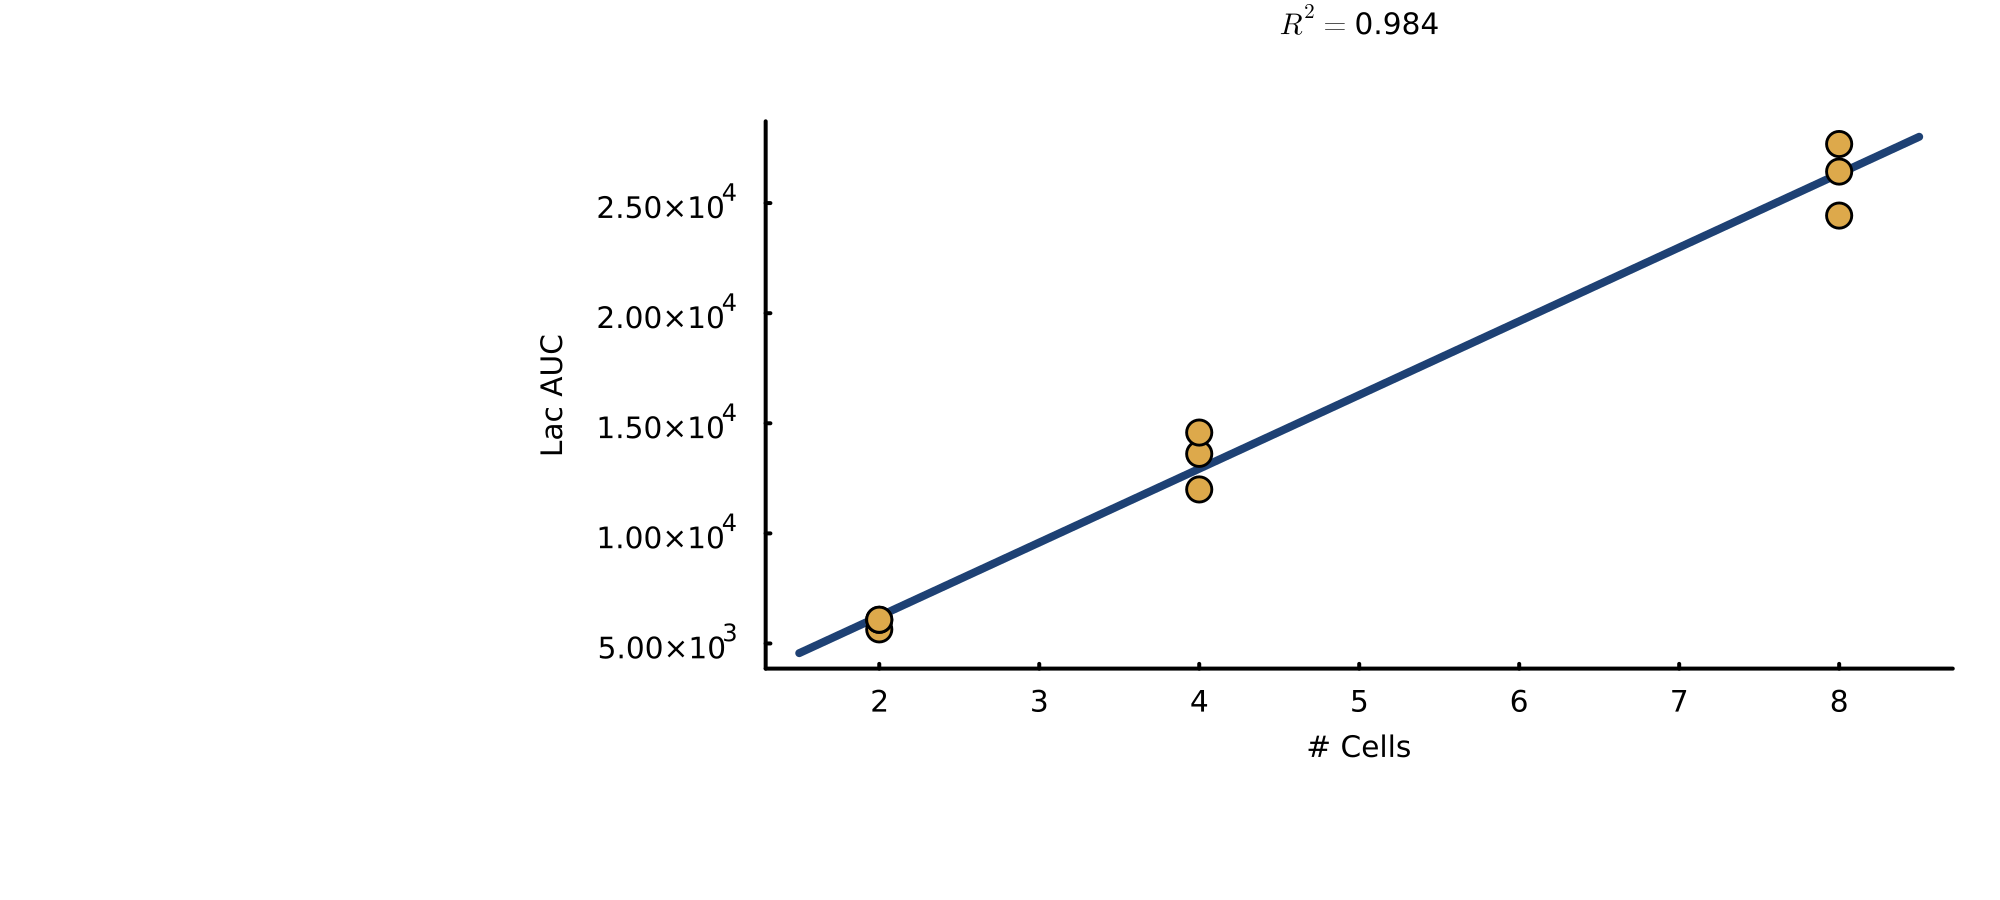

In [23]:
pps = plot(1.5:8.5, predict(ols, DataFrame(X = 1.5:8.5)), title = L"R^2 = "*string(round(r2(ols), digits=3)), label = "", colour="#1e4174ff", linewidth = 2)

scatter!(ncs, dlr, grid = false, label = "", xlabel = "# Cells", ylabel = "Lac AUC", markersize=3.5, markerstrokewidth=0.4, titlefontsize = 5,
linewidth=1.5, size = (2000,900), xguidefontsize=round(25/5), yguidefontsize=round(25/5), tickfontsize=round(25/5), thickness_scaling = 4, legendfontsize=5, colour="#dda94bff")

savefig("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\Figures\\Figure2Stuff\\DataLinearRelation.svg")

display(pps)

## Posterior Prediction No Transporter

In [16]:
tsC2 = dat2[:,1]
ts = 0:tsC2[end];
ivss = [dat2[1,2], dat2[1,4]];
samps = convert.(Int, tsC2);
SimOnTime1poster, SimOffTime1poster, SimAll1poster  = PyruvateHP_NMR_SolveAll(ts, hcat(posterNT[:,1:2].*2, posterNT[:,4], posterNT[:,3], zeros(8000)), ivss, samps);

tsC4 = dat4[:,1]
ts = 0:tsC4[end];
ivss = [dat4[1,2], dat4[1,4]];
samps = convert.(Int, tsC4);
SimOnTime2poster, SimOffTime2poster, SimAll2poster  = PyruvateHP_NMR_SolveAll(ts, hcat(posterNT[:,1:2].*4, posterNT[:,4], posterNT[:,3], zeros(8000)), ivss, samps);

tsC8 = dat8[:,1]
ts = 0:tsC8[end];
ivss = [dat8[1,2], dat8[1,4]];
samps = convert.(Int, tsC8);
SimOnTime3poster, SimOffTime3poster, SimAll3poster  = PyruvateHP_NMR_SolveAll(ts, hcat(posterNT[:,1:2].*8, posterNT[:,4], posterNT[:,3], zeros(8000)), ivss, samps);

In [17]:
posterSims = [SimOnTime1poster, SimOnTime2poster, SimOnTime3poster];

In [18]:
# Dims = Up/Down, Observable, Experiment
PosterQuant = Array{Any}(undef,2,2,3);

for k in 1:2
    for m in 1:3
        PosterQuant[1,k,m] = [percentile(posterSims[m][j,k,:], 99.5) for j in 1:size(posterSims[m][:,k,1])[1]]; # Up
        PosterQuant[2,k,m] = [percentile(posterSims[m][j,k,:], 0.5 ) for j in 1:size(posterSims[m][:,k,1])[1]]; # Down
    end
end

## Posterior Prediction Transporter

In [19]:
tsC2 = dat2[:,1]
ts = 0:tsC2[end];
ivss = [dat2[1,2], 0, dat2[1,4]];
samps = convert.(Int, tsC2);
SimOnTime1posterT, SimOffTime1posterT, SimAll1posterT  = PyruvateHP_NMR_SolveAllTb(ts, hcat(posterT[:,1:2].*2, posterT[:,4], posterT[:,3], posterT[:,end].*2, zeros(8000)), ivss, samps);

tsC4 = dat4[:,1]
ts = 0:tsC4[end];
ivss = [dat4[1,2], 0, dat4[1,4]];
samps = convert.(Int, tsC4);
SimOnTime2posterT, SimOffTime2posterT, SimAll2posterT  = PyruvateHP_NMR_SolveAllTb(ts, hcat(posterT[:,1:2].*4, posterT[:,4], posterT[:,3], posterT[:,end].*4, zeros(8000)), ivss, samps);

tsC8 = dat8[:,1]
ts = 0:tsC8[end];
ivss = [dat8[1,2], 0, dat8[1,4]];
samps = convert.(Int, tsC8);
SimOnTime3posterT, SimOffTime3posterT, SimAll3posterT  = PyruvateHP_NMR_SolveAllTb(ts, hcat(posterT[:,1:2].*8, posterT[:,4], posterT[:,3], posterT[:,end].*8, zeros(8000)), ivss, samps);

In [20]:
posterSimsT = [SimOnTime1posterT, SimOnTime2posterT, SimOnTime3posterT];

In [21]:
# Dims = Up/Down, Observable, Experiment
PosterQuantT = Array{Any}(undef,2,3,3);

for k in 1:3
    for m in 1:3
        PosterQuantT[1,k,m] = [percentile(posterSimsT[m][j,k,:], 99.5) for j in 1:size(posterSimsT[m][:,k,1])[1]]; # Up
        PosterQuantT[2,k,m] = [percentile(posterSimsT[m][j,k,:], 0.5 ) for j in 1:size(posterSimsT[m][:,k,1])[1]]; # Down
    end
end

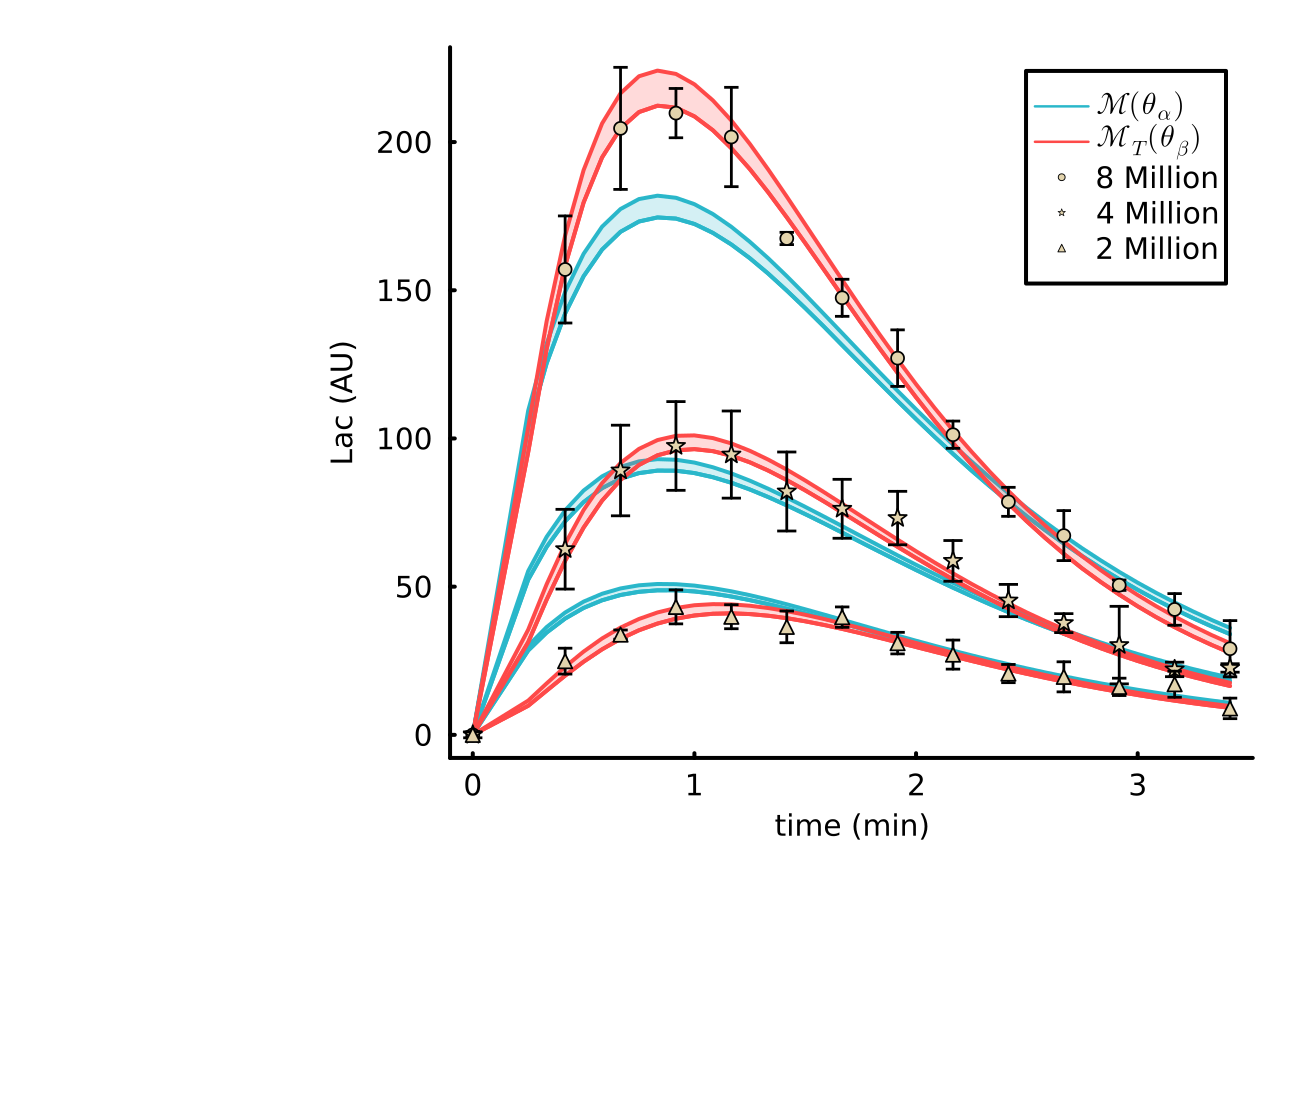

In [22]:

ppt = plot(grid = false, markersize=1, markerstrokewidth=0.2, 
linewidth=1.5, size = (1300,1100), xguidefontsize=round(25/5), yguidefontsize=round(25/5), tickfontsize=round(25/5), thickness_scaling = 4, legendfontsize=5)


skp = 3
nd = 40



# No transporter model 
cl = "#2ab7ca"
plot!(tsC2[1:nd]./60, PosterQuant[1,2,1][1:nd], label = L"\mathcal{M}(\theta_{\alpha})", color = cl, linewidth = 1,
    xlabel = "time (min)", ylabel = "Lac (AU)")
plot!(tsC2[1:nd]./60, PosterQuant[2,2,1][1:nd], label = "", color = cl, linewidth = 1)
plot!(tsC2[1:nd]./60, PosterQuant[2,2,1][1:nd], fillrange=PosterQuant[1,2,1], label="", color=cl, fillalpha=0.2)


plot!(tsC2[1:nd]./60, PosterQuant[1,2,2][1:nd], label = "", color = cl, linewidth = 1,
    xlabel = "time (min)", ylabel = "Lac (AU)")
plot!(tsC2[1:nd]./60, PosterQuant[2,2,2][1:nd], label = "", color = cl, linewidth = 1)
plot!(tsC2[1:nd]./60, PosterQuant[2,2,2][1:nd], fillrange=PosterQuant[1,2,2], label="", color=cl, fillalpha=0.2)


plot!(tsC2[1:nd]./60, PosterQuant[1,2,3][1:nd], label = "", color = cl, linewidth = 1,
    xlabel = "time (min)", ylabel = "Lac (AU)")
plot!(tsC2[1:nd]./60, PosterQuant[2,2,3][1:nd], label = "", color = cl, linewidth = 1)
plot!(tsC2[1:nd]./60, PosterQuant[2,2,3][1:nd], fillrange=PosterQuant[1,2,3], label="", color=cl, fillalpha=0.2)



# Transporter Model
cl = "#fe4a49"
plot!(tsC2[1:nd]./60, PosterQuantT[1,3,1][1:nd], label = L"\mathcal{M}_T(\theta_{\beta})", color = cl, linewidth = 1,
    xlabel = "time (min)", ylabel = "Lac (AU)")
plot!(tsC2[1:nd]./60, PosterQuantT[2,3,1][1:nd], label = "", color = cl, linewidth = 1)
plot!(tsC2[1:nd]./60, PosterQuantT[2,3,1][1:nd], fillrange=PosterQuantT[1,3,1], label="", color=cl, fillalpha=0.2)


plot!(tsC2[1:nd]./60, PosterQuantT[1,3,2][1:nd], label = "", color = cl, linewidth = 1,
    xlabel = "time (min)", ylabel = "Lac (AU)")
plot!(tsC2[1:nd]./60, PosterQuantT[2,3,2][1:nd], label = "", color = cl, linewidth = 1)
plot!(tsC2[1:nd]./60, PosterQuantT[2,3,2][1:nd], fillrange=PosterQuantT[1,3,2], label="", color=cl, fillalpha=0.2)


plot!(tsC2[1:nd]./60, PosterQuantT[1,3,3][1:nd], label = "", color = cl, linewidth = 1,
    xlabel = "time (min)", ylabel = "Lac (AU)")
plot!(tsC2[1:nd]./60, PosterQuantT[2,3,3][1:nd], label = "", color = cl, linewidth = 1)
plot!(tsC2[1:nd]./60, PosterQuantT[2,3,3][1:nd], fillrange=PosterQuantT[1,3,3], label="", color=cl, fillalpha=0.2)



# Data
cl = "#e3d4ad"
scatter!(tsC2[1:skp:nd]./60, dat[3][:,4][1:skp:nd], yerror = dat[3][:,5][1:skp:nd], colour = cl, label = "8 Million",  grid = false, markersize=1.8, markerstrokewidth=0.2, 
linewidth=0.7, xguidefontsize=round(25/5), yguidefontsize=round(25/5), tickfontsize=round(25/5), thickness_scaling = 4, legendfontsize=5)
scatter!(tsC2[1:skp:nd]./60, dat[2][:,4][1:skp:nd], yerror = dat[2][:,5][1:skp:nd], colour = cl, label = "4 Million",  grid = false, markersize=2.4, markerstrokewidth=0.2, 
linewidth=0.7, xguidefontsize=round(25/5), yguidefontsize=round(25/5), tickfontsize=round(25/5), thickness_scaling = 4, legendfontsize=5, markershape = :star5)
scatter!(tsC2[1:skp:nd]./60, dat[1][:,4][1:skp:nd], yerror = dat[1][:,5][1:skp:nd], colour = cl, label = "2 Million",  grid = false, markersize=1.8, markerstrokewidth=0.2, 
linewidth=0.7, xguidefontsize=round(25/5), yguidefontsize=round(25/5), tickfontsize=round(25/5), thickness_scaling = 4, legendfontsize=5, markershape = :utriangle)


# savefig("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\Figures\\Figure2Stuff\\PosteriorPredictionLactateBothMods.svg")


display(ppt)

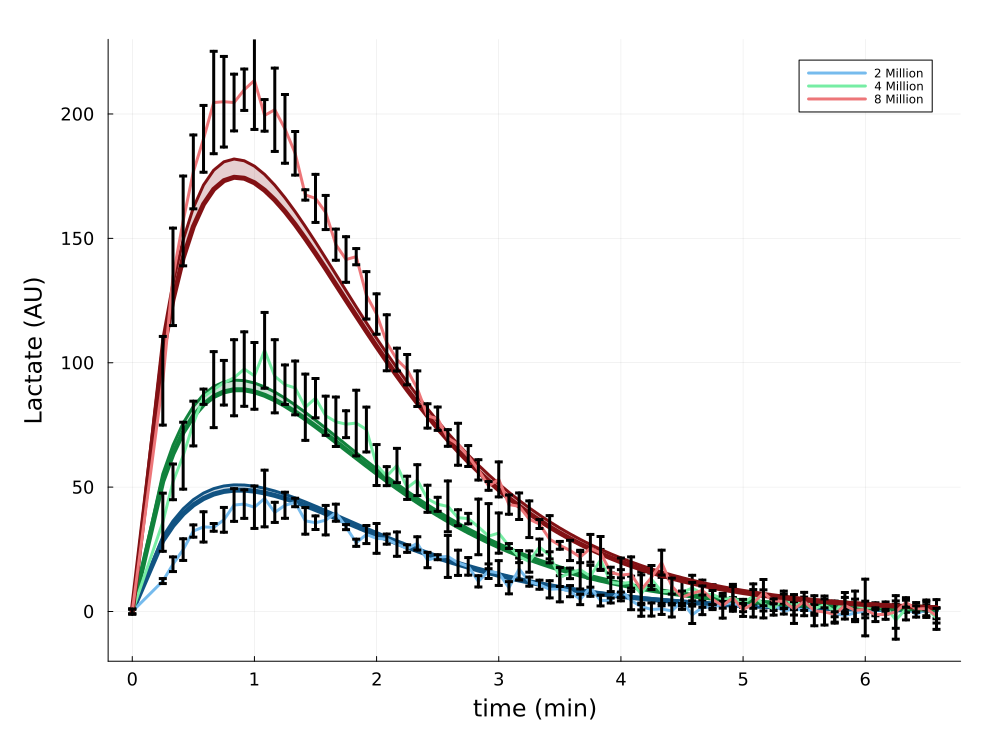

In [13]:
pp2 = plot(tsC2./60, PosterQuant[1,2,1], label = "", color = "#115382ff", linewidth = 3,
        margin=10Plots.mm,xtickfont=font(16), ytickfont=font(16), guidefont=font(18), titlefont=font(18),
        xlabel = "time (min)", ylabel = "Lactate (AU)")
        plot!(tsC2./60, PosterQuant[2,2,1], label = "", color = "#115382ff", linewidth = 5)
        plot!(tsC2./60, PosterQuant[2,2,1], fillrange=PosterQuant[1,2,1], label="", color="#115382ff", fillalpha=0.2)
        plot!(tsC2./60, dat[1][:,4], yerror = dat[1][:,5], linewidth = 3, colour = "#76bbedff", label = "2 Million")


        plot!(tsC2./60, PosterQuant[1,2,2], label = "", color = "#11823cff", linewidth = 3,
        margin=10Plots.mm,xtickfont=font(16), ytickfont=font(16), guidefont=font(18), titlefont=font(18),
        xlabel = "time (min)", ylabel = "Lactate (AU)")
        plot!(tsC2./60, PosterQuant[2,2,2], label = "", color = "#11823cff", linewidth = 5)
        plot!(tsC2./60, PosterQuant[2,2,2], fillrange=PosterQuant[1,2,2], label="", color="#11823cff", fillalpha=0.2)
        plot!(tsC2./60, dat[2][:,4], yerror = dat[2][:,5], linewidth = 3, colour = "#76eda4ff", label = "4 Million")

        plot!(tsC2./60, PosterQuant[1,2,3], label = "", color = "#821114ff", linewidth = 3,
        margin=10Plots.mm,xtickfont=font(16), ytickfont=font(16), guidefont=font(18), titlefont=font(18),
        xlabel = "time (min)", ylabel = "Lactate (AU)")
        plot!(tsC2./60, PosterQuant[2,2,3], label = "", color = "#821114ff", linewidth = 5)
        plot!(tsC2./60, PosterQuant[2,2,3], fillrange=PosterQuant[1,2,3], label="", color="#821114ff", fillalpha=0.2)
        plot!(tsC2./60, dat[3][:,4], yerror = dat[3][:,5], linewidth = 3, colour = "#ed7679ff", label = "8 Million")

pFF = plot(pp2, size = (1000,750), margin = 8mm, xguidefontsize=16, yguidefontsize=16, tickfontsize=12, ylim=(-20,230))


# savefig("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\Figures\\SVGsInit\\PosteriorPredictionLactateNoTransporter.svg")


display(pFF)